# Задание №2. 

В файле task2.csv представлены обезличенные фингерпринты по различным счетам.
Выделите подозрительные аномалии, визуализируйте и представьте их. Что вы можете сказать о данных аномалиях.

In [75]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [76]:
task2 = pd.read_csv('/mnt/HC_Volume_18315164/home-jupyter/jupyter-viktorija-orehova--6e277/task2.csv', header=None)

In [77]:
# Переименовываем названия столбцов для удобного взаимодействия
task2.columns = ['user_id', 'time_event', 'session_id', 'device', 'event_id', 'time_reg_event']

**Аномалия №1:** если сервис не международный, активность ночью (например: с 3:00 до 5:00) может быть подозрительной.

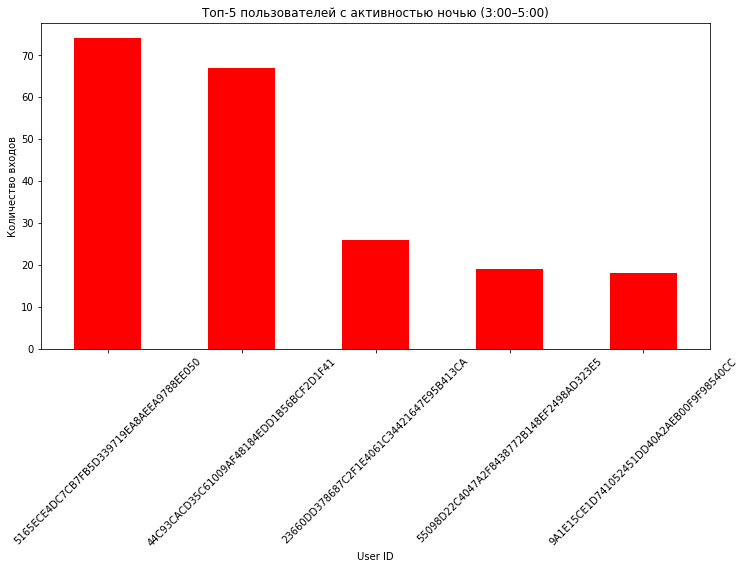

In [78]:
# 1. Подготовим данные
task2['time_event'] = pd.to_datetime(task2['time_event'])
task2['time_hour'] = task2['time_event'].dt.hour

# 2. Анализируем исходя из условий рассматриваемой аномалии
night_hours = [3, 4, 5]
night_activity = task2[task2['time_hour'].isin(night_hours)]
night_users = night_activity.groupby('user_id').size().sort_values(ascending=False).head(5)

# 3. Визуализируем данные
plt.figure(figsize=(12, 6))
night_users.plot(kind='bar', color='red')
plt.title('Топ-5 пользователей с активностью ночью (3:00–5:00)')
plt.xlabel('User ID')
plt.ylabel('Количество входов')
plt.xticks(rotation=45)
plt.show()

In [79]:
# 4. Вывод результатов
print("Топ-5 пользователей с ночной активностью:")
print(night_users.reset_index().to_string(index=False, header=['User ID', 'Количество входов']))

Топ-5 пользователей с ночной активностью:
                                  User ID Количество входов
 5165ECE4DC7CB7FB5D339719EA8AEEA9788EE050                74
 44C93CACD35C61009AF48184EDD1B56BCF2D1F41                67
 23660DD378687C2F1E4061C34421647E95B413CA                26
 55098D22C4047A2F8438772B148EF2498AD323E5                19
 9A1E15CE1D741052451DD40A2AEB00F9F98540CC                18


**Аномалия №2:** если пользователь совершает слишком много действий за короткий промежуток времени.

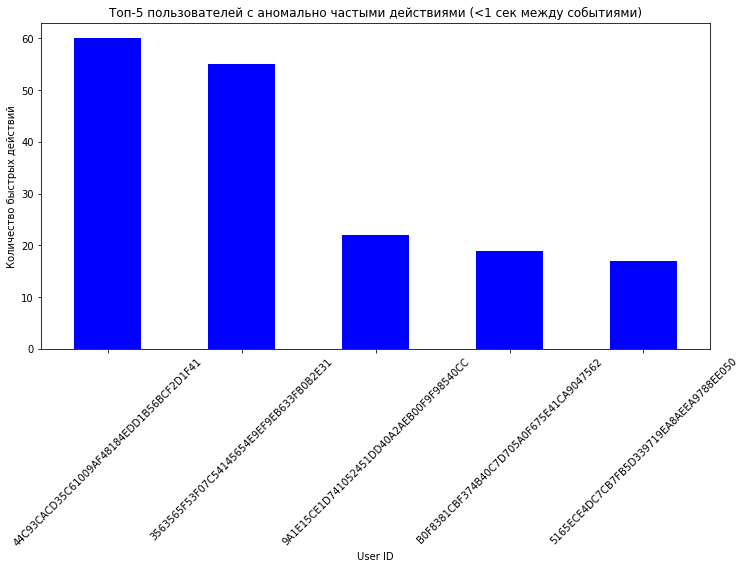

In [80]:
# 1. Подготовим данные
task2_sorted = task2.sort_values('time_event')
task2_sorted['time_diff'] = task2_sorted.groupby('user_id')['time_event'].diff().dt.total_seconds()

# 2. Анализируем исходя из условий рассматриваемой аномалии
bot_like_activity = task2_sorted[task2_sorted['time_diff'] < 1.0]
bot_users = bot_like_activity.groupby('user_id').size().sort_values(ascending=False).head(5)

# 3. Визуализируем данные
plt.figure(figsize=(12, 6))
bot_users.plot(kind='bar', color='blue')
plt.title('Топ-5 пользователей с аномально частыми действиями (<1 сек между событиями)')
plt.xlabel('User ID')
plt.ylabel('Количество быстрых действий')
plt.xticks(rotation=45)
plt.show()

In [82]:
# 4. Вывод результатов
print("Топ-5 подозрительных пользователей:")
print(bot_users.reset_index().to_string(index=False, header=['User ID', 'Быстрых действий']))
plt.show()

Топ-5 подозрительных пользователей:
                                  User ID Быстрых действий
 44C93CACD35C61009AF48184EDD1B56BCF2D1F41               60
 3563565F53F07C54145654E9EF9EB633FB0B2E31               55
 9A1E15CE1D741052451DD40A2AEB00F9F98540CC               22
 B0F8381CBF374B40C7D705A0F675E41CA9047562               19
 5165ECE4DC7CB7FB5D339719EA8AEEA9788EE050               17


**Аномалия №3:** пользователь заходит с разных устройств  мобильная версия --> десктоп устройство за несколько минут.

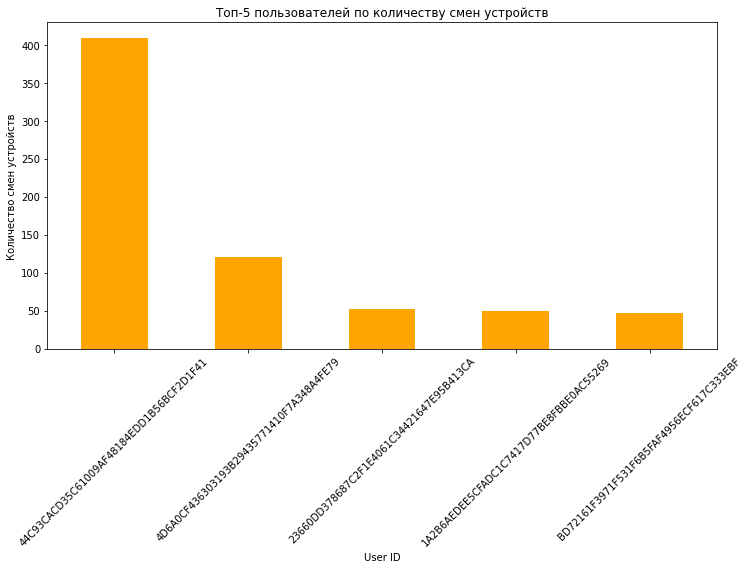

In [83]:
# 1. Подготовим данные
def get_device_type(device):
    device = str(device).lower()
    if 'mobile' in device or 'android' in device or 'iphone' in device:
        return 'Mobile'
    elif 'windows' in device or 'linux' in device or 'mac' in device:
        return 'Desktop'
    return 'Other'

task2['device_type'] = task2['device'].apply(get_device_type)
task2_sorted = task2.sort_values(['user_id', 'time_event'])

# 2. Анализируем исходя из условий рассматриваемой аномалии
task2_sorted['device_change'] = task2_sorted.groupby('user_id')['device_type'].transform(lambda x: x.ne(x.shift()))
device_switches = task2_sorted.groupby('user_id')['device_change'].sum().sort_values(ascending=False).head(5)

# 3. Визуализируем данные
plt.figure(figsize=(12, 6))
device_switches.plot(kind='bar', color='orange')
plt.title('Топ-5 пользователей по количеству смен устройств')
plt.xlabel('User ID')
plt.ylabel('Количество смен устройств')
plt.xticks(rotation=45)
plt.show()

In [84]:
# 4. Вывод результатов
print("Топ-5 пользователей по сменам устройств:")
print(device_switches.reset_index().to_string(index=False, header=['User ID', 'Смен устройств']))

Топ-5 пользователей по сменам устройств:
                                  User ID Смен устройств
 44C93CACD35C61009AF48184EDD1B56BCF2D1F41            409
 4D6A0CF436303193B29435771410F7A348A4FE79            120
 23660DD378687C2F1E4061C34421647E95B413CA             52
 1A2B6AEDEE5CFADC1C7417D77BE8FBBE0AC55269             50
 BD72161F3971F531F6B5FAF4956ECF617C333EBF             47


# Вывод 


На основе анализа данных выявлены три ключевые аномалии, указывающие на подозрительную активность. Аккумулируем всю полученную информацию.


**1. Ночная активность**

Топ-5 пользователей:

User ID                                    
5165ECE4DC7CB7FB5D339719EA8AEEA9788EE050	
44C93CACD35C61009AF48184EDD1B56BCF2D1F41	
23660DD378687C2F1E4061C34421647E95B413CA	
55098D22C4047A2F8438772B148EF2498AD323E5	
9A1E15CE1D741052451DD40A2AEB00F9F98540CC

**2. Частые действия**

Топ-5 пользователей:

User ID	
44C93CACD35C61009AF48184EDD1B56BCF2D1F41	
3563565F53F07C54145654E9EF9EB633FB0B2E31	
9A1E15CE1D741052451DD40A2AEB00F9F98540CC	
B0F8381CBF374B40C7D705A0F675E41CA9047562	
5165ECE4DC7CB7FB5D339719EA8AEEA9788EE050	

**3. Частая смена устройств**

Топ-5 пользователей:

User ID	
44C93CACD35C61009AF48184EDD1B56BCF2D1F41	
4D6A0CF436303193B29435771410F7A348A4FE79	
23660DD378687C2F1E4061C34421647E95B413CA	
1A2B6AEDEE5CFADC1C7417D77BE8FBBE0AC55269	
BD72161F3971F531F6B5FAF4956ECF617C333EBF	

Пользователь **44C93CACD35C61009AF48184EDD1B56BCF2D1F41**

67 ночных действий + 60 быстрых запросов + 409 смен устройств, что влечет за собой высокую вероятность взлома.

Пользователь **5165ECE4DC7CB7FB5D339719EA8AEEA9788EE050**

74 ночных действия + 17 быстрых запросов, возможно работа ночного бота.

Пользователь **9A1E15CE1D741052451DD40A2AEB00F9F98540CC**

18 ночных действий + 22 быстрых запроса, возможна работа бота или скрипта, необходима проверка и мониторинг. 

**Общий вывод:**

Пользователь с user_id **44C93CACD35C61009AF48184EDD1B56BCF2D1F41** — главный кандидат на блокировку.

Пользователи **5165ECE4DC7CB7FB5D339719EA8AEEA9788EE050** и **9A1E15CE1D741052451DD40A2AEB00F9F98540CC** требуют мониторинга.
